<h1 style="text-align: center;">Penguins Dataset Analysis</h1>
<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/lter_penguins.png" alt="Example Image">


<h2>Introduction</h2>

<p>In this notebook, I will be exploring the Palmer Penguins dataset. This data was collected between 2007 and 2009, and made available by Dr Kristen Gorman and the Palmer Station, a member of the Long Term Ecological Research Network. This dataset is intended as an alternative to the iris dataset (making my mind immediately jump to classification, but this beyond the scope of this project). </p>

<p>The notebook is broken down into three sections:</p>
<ol>
    <li>Loading and Inspecting the Data.</li>
    <li>Visualising the Categorical and Numerical components of the data set.</li>
    <li>Inspecting the correlations of the Numerical components of the data set.</li>
</ol>

<h2>1. Load and Inspect Data</h2>

<h3>1.1 Initial Data Load and Inspection </h3>

<p>After looking through the <a href="https://allisonhorst.github.io/palmerpenguins/articles/intro.html"> the provided webpage</a>, we can find the <a href="https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv">directory for the data</a> on Github.
We can easily pull this into a DataFrame using Pandas, explore the values.
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

penguins= pd.read_csv(url)

<p>We can take a look at the structure of the dataset, by looking at the first 10 rows to get a feel for the kind of data we'll be analysing. </p>

In [3]:
penguins.head(11)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


<p>Similarly, we can get a feel for the data types of our fields in our dataset, and the amount of non-null values. <p>

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


<p>Based on this initial exploration of the dataset, we can see the following:</p>

<h3>1.2 Analysis of the Columns and their Structures</h3>
<ol>
    <li>The dataset contains 8 columns, with 344 rows.</li>
    <li>These 8 columns correspond to 3 different types of data:
        <ol>
            <li>String data, corresponding to identification of categorical features of the birds:</li>
                <ul>
                    <li><strong>species</strong>: The species of the bird.</li>
                    <li><strong>island</strong>: The island associated with the bird.</li>
                    <li><strong>sex</strong>: The sex of the bird.</li>
                </ul>
            </li>
            <li>Numerical data corresponding to the physical features of the birds, stored as Floats:
                <ul>
                    <li><strong>bill_length_mm</strong>: Bill Length for a given bird in mm.</li>
                    <li><strong>bill_depth_mm</strong>: Bill Depth for a given bird in mm.</li>
                    <li><strong>flipper_length_mm</strong>: Flipper Length for a given bird in mm.</li>
                    <li><strong>body_mass_g</strong>: Body Mass for a given bird in g.</li>
                </ul>
            </li>
            <li>Numerical data stored as integers:
                <ul>
                    <li><strong>year</strong>: The year the penguin was studied.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li>Of the 8 columns, only 3 columns have an entry for each of the 344 rows of data, with the following breakdown:</li>
        <ul>
            <li><strong>species</strong>, <strong>island</strong>, and <strong>year</strong> have 344 non-null rows. </li>
            <li><strong>bill_length_mm</strong>, <strong>bill_depth_mm</strong>, <strong>flipper_length_mm</strong>, and <strong>body_mass_g</strong> have 342 non-null entries.</li>
            <li><strong>sex</strong> has 333 entries. </li>
        </ul>
</ol>

<p>It is clear based on this inspection that when the readings were taken, for each of these the species was noted, the island which the given species of the bird inhabited was noted, and the year was noted, while the sex was only missing for one of the readings, and the readings for the physical features of the birds was only missing for 2 of the entries. </p>

<h4>1.2.1 Inspection of Categorical and Non-Null Columns</h4>

<p>Next, we will take a deeper look into the categorical columns, as 2 of these have all non-null rows, while <strong>sex</strong> has 11 missing entries. We will also take a look at the <strong>year</strong> column, as while this is a numeric column, it contains all non-null values, and has only 3 possible values:</p>

In [5]:
penguins['year'].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

<p>As <strong>year</strong> only has 3 possible values, it makes more sense to treat this a string value, as we have no reason to consider any statistics for this column or anything numeric specific. </p>

In [6]:
penguins['year'] = penguins['year'].astype(str)

<p>If we look at the <strong>species</strong>, we can see that there are only 3 represented in the dataset. However, the distribution of these is not uniform.</p>

In [7]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<p>We can easily visualise the breakdown of each species per island:</p>

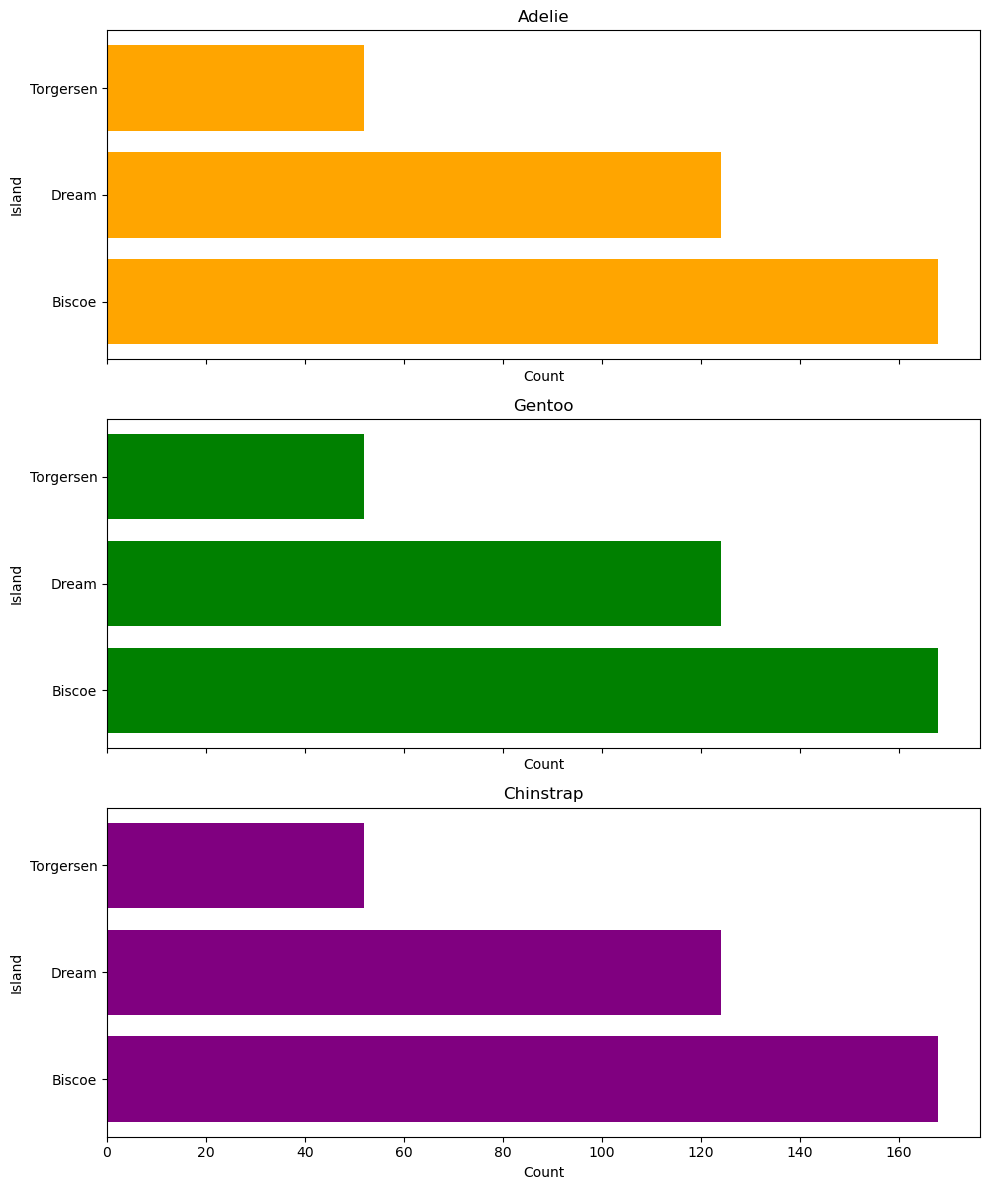

In [8]:
# Define colors and patterns for each species
species_colors = {'Adelie': 'orange', 'Chinstrap': 'purple', 'Gentoo': 'green'}

# Create subplots for each species
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Iterate over each species and create bar plots
for i, species in enumerate(penguins['species'].unique()):
    # Group by 'island' and count occurrences
    island_counts = penguins['island'].value_counts()
    
    # Plot bar chart for the current species
    axes[i].barh(island_counts.index, island_counts.values, color=species_colors[species])
    axes[i].set_title(species)
    axes[i].set_ylabel('Island')
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.show()


<p>Next, we take a look at the <strong>island</strong> column, and see something similar:</p>

In [9]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<p>We can also see a breakdown of the dataset by island and species. </p>

In [10]:
penguins.groupby('island')['species'].value_counts().unstack().fillna('')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44.0,,124.0
Dream,56.0,68.0,
Torgersen,52.0,,


We learn the following:

<ol>
    <li>The Adelie species were spread fairly evenly across the Biscoe, Dream, and Torgersen islands.</li>
    <li>All of the Gentoo species were observed on the Biscoe island.</li>
    <li>All of the Chinstrap species were observed on the Dream island. </li>
 </ol>

<p>If we take a look at the year column, we can see that the amount of readings increases each year, however not by much, and therefore we don't have an over-representation of any year. </p>

In [11]:
penguins['year'].value_counts()

year
2009    120
2008    114
2007    110
Name: count, dtype: int64

<p>If we take a look at the years in which the readings were taken for each of the species, we see a fairly uniform distribution for each of the species.</p>

In [12]:
penguins.groupby('year')['species'].value_counts().unstack()

species,Adelie,Chinstrap,Gentoo
year,,,
2007,50,26,34
2008,50,18,46
2009,52,24,44


<p>Taking a look at this as a percentage then:</p>

In [13]:
# Group by 'year' and 'species' and count occurrences
species_counts_by_year = penguins.groupby('year')['species'].value_counts().unstack()

# Calculate the total count for each year
total_counts_by_year = penguins.groupby('year')['species'].count()

# Calculate the percentage of each species within each year
round(species_counts_by_year.div(total_counts_by_year, axis=0) * 100, 2)

species,Adelie,Chinstrap,Gentoo
year,,,
2007,45.45,23.64,30.91
2008,43.86,15.79,40.35
2009,43.33,20.00,36.67


<p>We can also take a look then at the sex of the birds. Firstly, we can take a look at the distribution of the sex of the birds on each island:</p>

In [14]:
penguins.groupby('island')['sex'].value_counts().unstack()

sex,female,male
island,,
Biscoe,80,83
Dream,61,62
Torgersen,24,23


<p>We see that there are no real extreme outlier scenarios. </p>

<p>Next, we can take a look at the distribution of the sex of the birds across the different species:</p>

In [15]:
penguins.groupby('species')['sex'].value_counts().unstack()

sex,female,male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


<p>We again see an almost perfectly even split (thanks Gentoo, for ruining that). </p>

<p>There are, however, 11 rows with mising values for the Sex of the birds, so let's take a look at those and see what's going on there. </p>

In [16]:
penguins[penguins['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


<p>We can see that the vast majority of the readings with missing sex came in 2007, with one error in 2008 and three in 2009. </p>

<p>We'll quickly capitalise the strings, as it will look nicer on our plots later on. </p>

In [17]:
penguins['sex'] = penguins['sex'].replace({'male': 'Male', 'female': 'Female'})

<h4>1.2.2 Inspection of Numerical Columns</h4>
<p>We can easily get a breakdown of a variety of statistics for the numerical fields within the dataset. </p>

In [18]:
round(penguins.describe(), 2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


<p>Interestingly, the only columns which have missing reading for our numeric fields are those which also have a missing sex, meaning these columns contain only the species, the island, and the year. </p>

In [19]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

missing_values = penguins[penguins[numeric_columns].isnull().any(axis = 1)]

missing_values

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


<p>These specific species/island/year combinations have enough datapoints that there isn't a risk of these missing values skewing our results. </p>

In [20]:
len(penguins[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen') & (penguins['year'] == '2007')])

20

In [21]:
len(penguins[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe') & (penguins['year'] == '2009')])

44

<p>Similarly, species-wise, island-wise, and year-wise:</p>

In [22]:
len(penguins[penguins['species'] == 'Adelie']), len(penguins[penguins['species'] == 'Gentoo'])

(152, 124)

In [23]:
len(penguins[penguins['island'] == 'Torgersen']), len(penguins[penguins['island'] == 'Biscoe'])

(52, 168)

In [24]:
len(penguins[penguins['year'] == '2007']), len(penguins[penguins['year'] == '2009'])

(110, 120)

<h3>1.3 Conclusions about Columns</h3>

<p>In Conclusion, we have both Categorical and Numerical Data in our Dataset. </p>

<ol>
    <li>Our categorical columns are <strong>species</strong>, <strong>island</strong>, <strong>sex</strong>, and <strong>year</strong> (which we have converted to a string). These variables can be modeled using Python's categorical data type, or one-hot encoding in the context of Machine Learning. </li>
    <li>Our numerical columns are <strong>bill_length_mm</strong>, <strong>bill_depth_mm</strong>, <strong>flipper_length_mm</strong>, and <strong>body_mass_g</strong>. These variables can be modeled using Python's numerical data types.</li>
</ol>

<h2>2. Visualise the Data </h2>
<h3>2.1 Visualisation of Categorical Data</h3>

<p>We can easily visualise the various categorical data points using bar charts. </p>

<p>Firstly, we visualise the <strong>species</strong> of the birds, and get a feel for how they are spread across the dataset. </p>

<p>Next, we visualise the island categorisation within the dataset:</p>

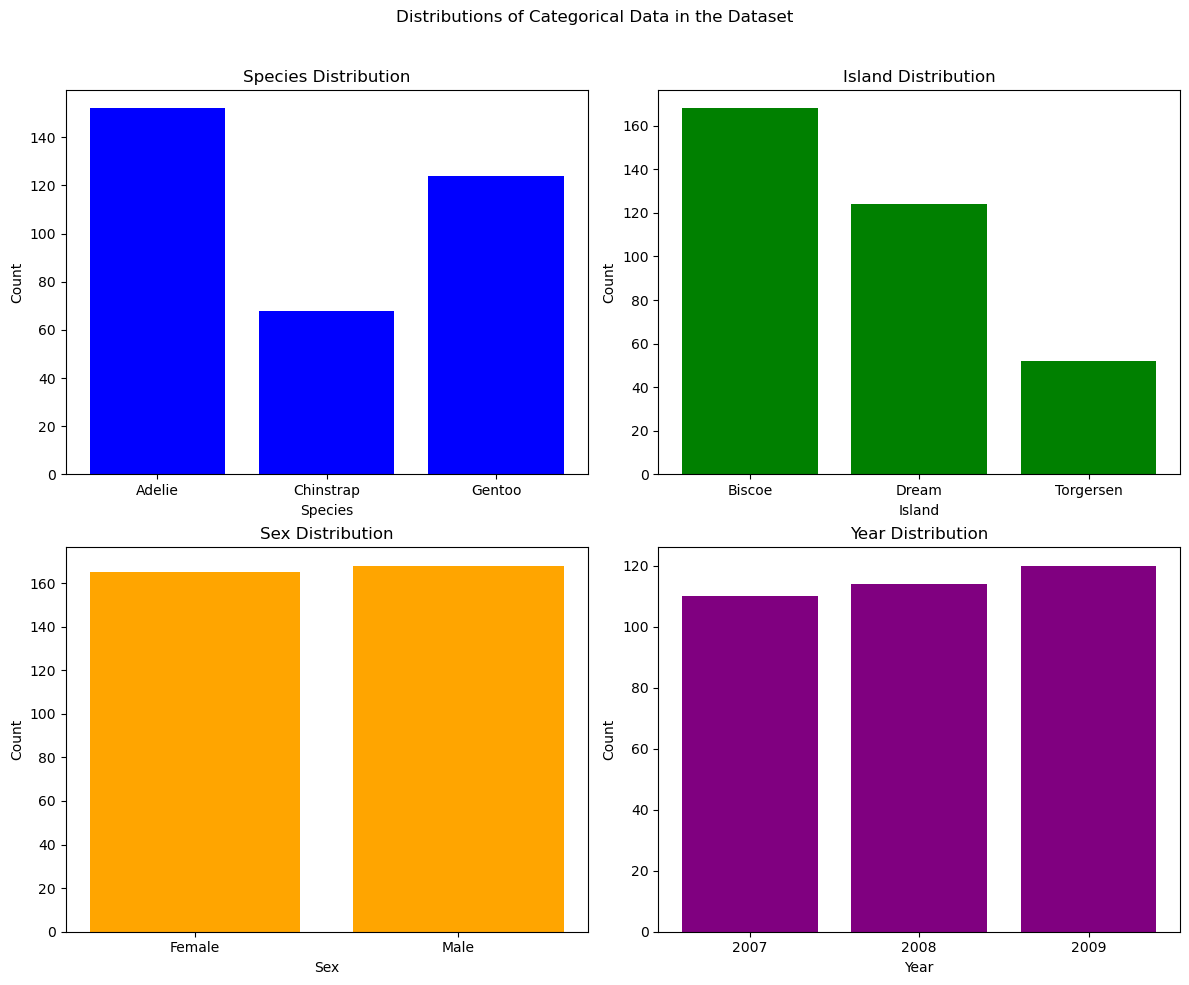

In [25]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot species distribution
species_counts = penguins['species'].value_counts().sort_index()
axes[0, 0].bar(species_counts.index, species_counts.values, color='blue')
axes[0, 0].set_title('Species Distribution')
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Count')

# Plot island distribution
island_counts = penguins['island'].value_counts().sort_index()
axes[0, 1].bar(island_counts.index, island_counts.values, color='green')
axes[0, 1].set_title('Island Distribution')
axes[0, 1].set_xlabel('Island')
axes[0, 1].set_ylabel('Count')

# Plot sex distribution
sex_counts = penguins['sex'].value_counts().sort_index()
axes[1, 0].bar(sex_counts.index, sex_counts.values, color='orange')
axes[1, 0].set_title('Sex Distribution')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')

# Plot year distribution
year_counts = penguins['year'].value_counts().sort_index()
axes[1, 1].bar(year_counts.index, year_counts.values, color='purple')
axes[1, 1].set_title('Year Distribution')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Add title to the full plot
fig.suptitle('Distributions of Categorical Data in the Dataset')

# Adjust layout to increase the distance between the top of the plots and the title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

<h3>2.2 Visualisation of Numerical Data in the Dataset</h3>

<p>We can also easily visualise 

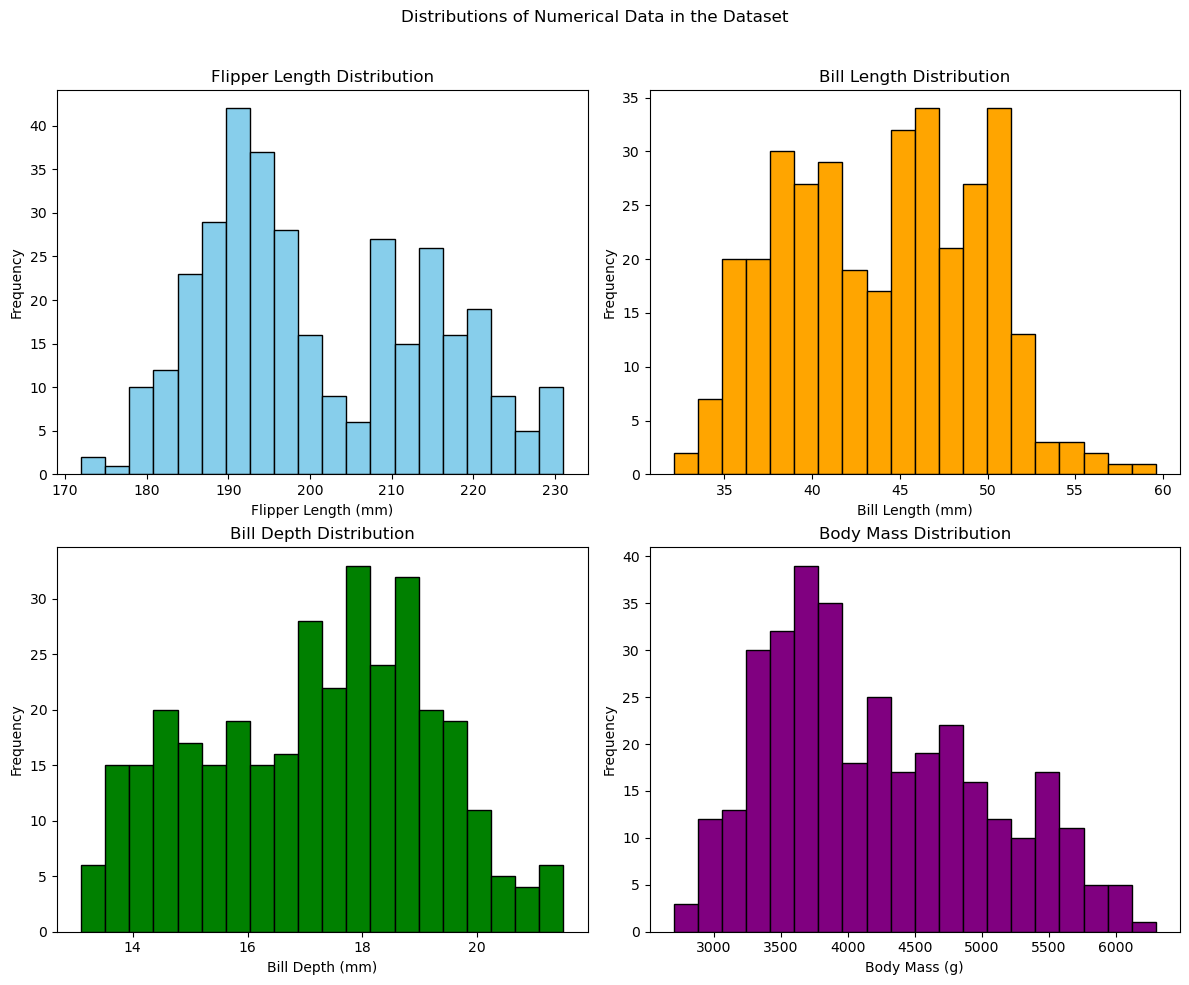

In [26]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for flipper length
axes[0, 0].hist(penguins['flipper_length_mm'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Flipper Length Distribution')
axes[0, 0].set_xlabel('Flipper Length (mm)')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for bill length
axes[0, 1].hist(penguins['bill_length_mm'], bins=20, color='orange', edgecolor='black')
axes[0, 1].set_title('Bill Length Distribution')
axes[0, 1].set_xlabel('Bill Length (mm)')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for bill depth
axes[1, 0].hist(penguins['bill_depth_mm'], bins=20, color='green', edgecolor='black')
axes[1, 0].set_title('Bill Depth Distribution')
axes[1, 0].set_xlabel('Bill Depth (mm)')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for body mass
axes[1, 1].hist(penguins['body_mass_g'], bins=20, color='purple', edgecolor='black')
axes[1, 1].set_title('Body Mass Distribution')
axes[1, 1].set_xlabel('Body Mass (g)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Add title to the full plot
fig.suptitle('Distributions of Numerical Data in the Dataset')

# Adjust layout to increase the distance between the top of the plots and the title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

<h2>3. Correlation Considerations</h2>

<p>In order for us to look at the correlation of our values, we must remove the categorical variables from our dataset. </p>

In [27]:
penguins_numeric = penguins[numeric_columns]

<p>We can then very easily generate a correlation matrix, to get a feel for the correlations between the various numeric fields in the dataset.</p>

In [28]:
correlation_matrix = round(penguins_numeric.corr(), 3)
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,-0.235,0.656,0.595
bill_depth_mm,-0.235,1.000,-0.584,-0.472
flipper_length_mm,0.656,-0.584,1.000,0.871
body_mass_g,0.595,-0.472,0.871,1.000


<p>We can visualise this heatmap fairly easily:</p>

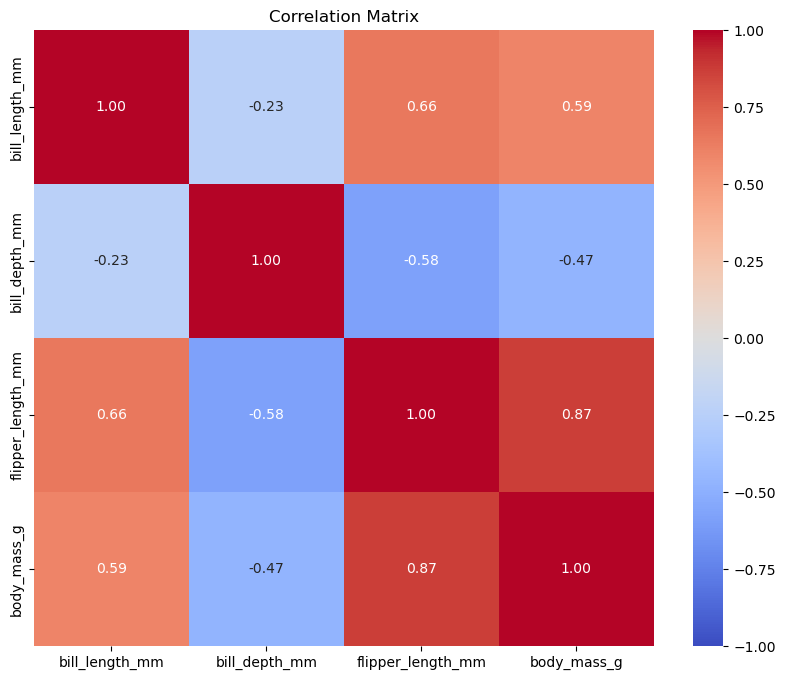

In [29]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<p>We can then set some threshold for our preferred correlation, and find the pair of datapoints which satisfy this desired correlation:</p>

In [30]:
# Set a threshold for correlation coefficient
threshold = 0.7

# Find pairs of variables with correlation coefficient above the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(pair, correlation_matrix.loc[pair[0], pair[1]])

Highly correlated pairs:
('flipper_length_mm', 'body_mass_g') 0.871


<p>We can see that <strong>flipper_length_mm</strong> and <strong>body_mass_g</strong> has a strong positive correlation of 0.871. We can see pretty clearly that they are strongly correlated: </p>

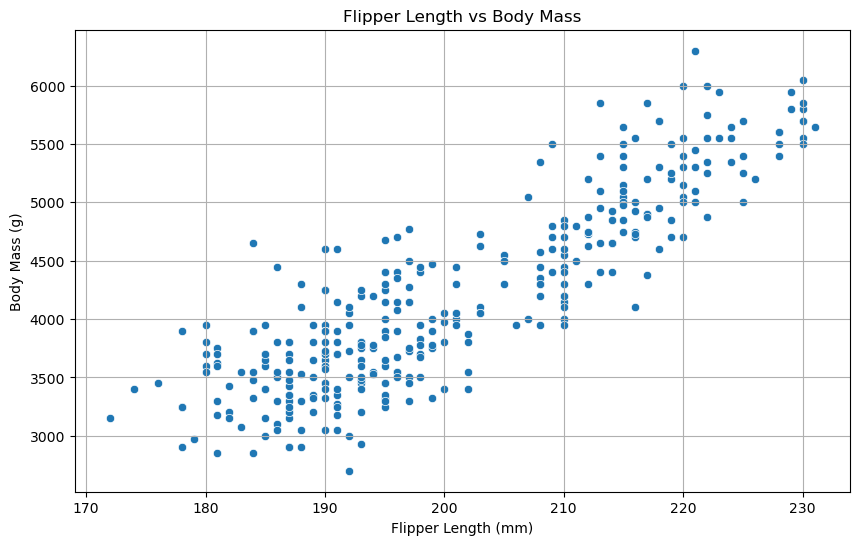

In [31]:
# Plot flipper_length_mm vs body_mass_g
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_numeric, x='flipper_length_mm', y='body_mass_g')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

<p>But, we noted earlier that there are some missing values in the dataset! Let's take a look at what happens when we drop our NA values. </p>

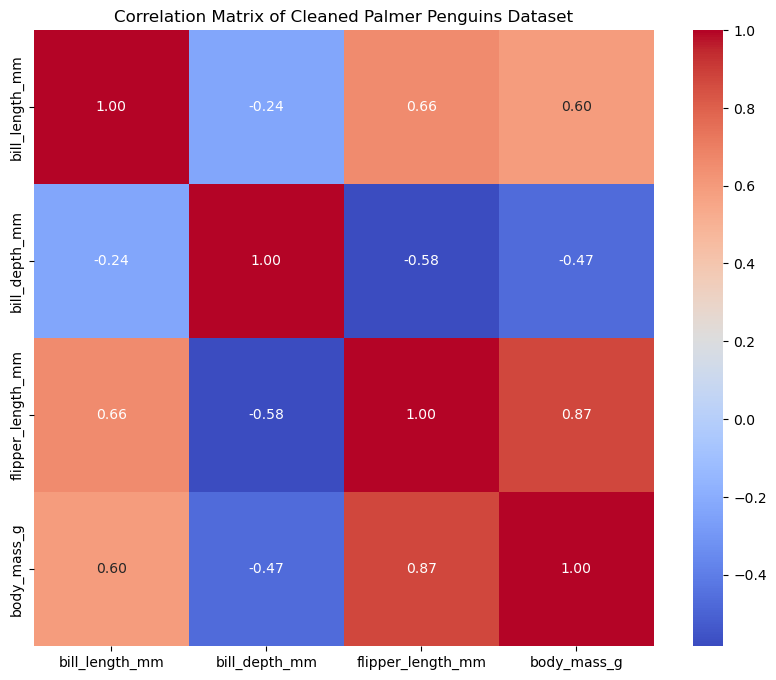

In [32]:
# Drop missing values and assign the result to a new variable
penguins_numeric_cleaned = penguins_numeric.dropna()

# Calculate correlation matrix
correlation_matrix = penguins_numeric_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Cleaned Palmer Penguins Dataset")
plt.show()

In [33]:
# Set a threshold for correlation coefficient
threshold = 0.7

# Find pairs of variables with correlation coefficient above the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(pair, correlation_matrix.loc[pair[0], pair[1]])

Highly correlated pairs:
('flipper_length_mm', 'body_mass_g') 0.8712017673060111


<p>We can see that there isn't really much of an impact when we drop the NA values. We see a 0.01 improvement in the negative correlation between <strong>bill_depth_mm</strong> and <strong>bill_length_mm</strong>, and a negligible improvement in the positive correlation between <strong>flipper_length_mm</strong> and <strong>body_mass_g</strong>. </p>

<p>Again, we can visualise it, but we don't see any difference:</p>

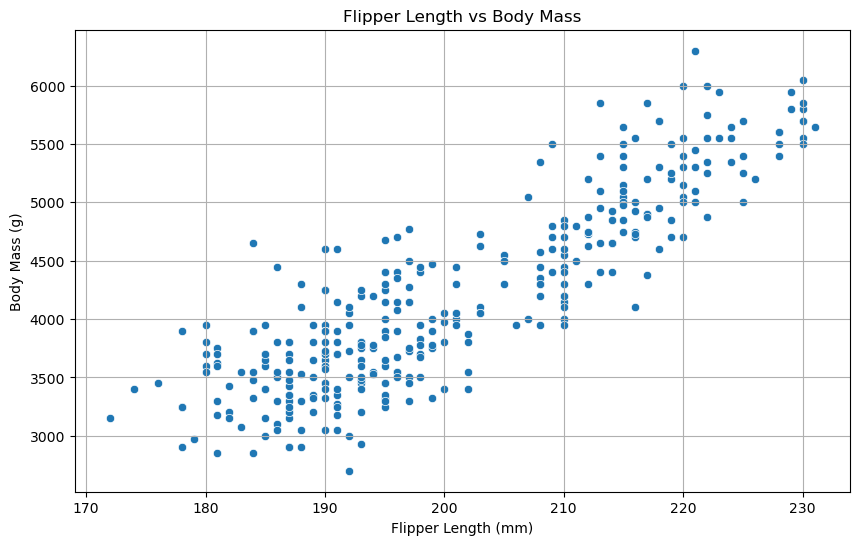

In [34]:
# Plot flipper_length_mm vs body_mass_g
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_numeric_cleaned, x='flipper_length_mm', y='body_mass_g')
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()